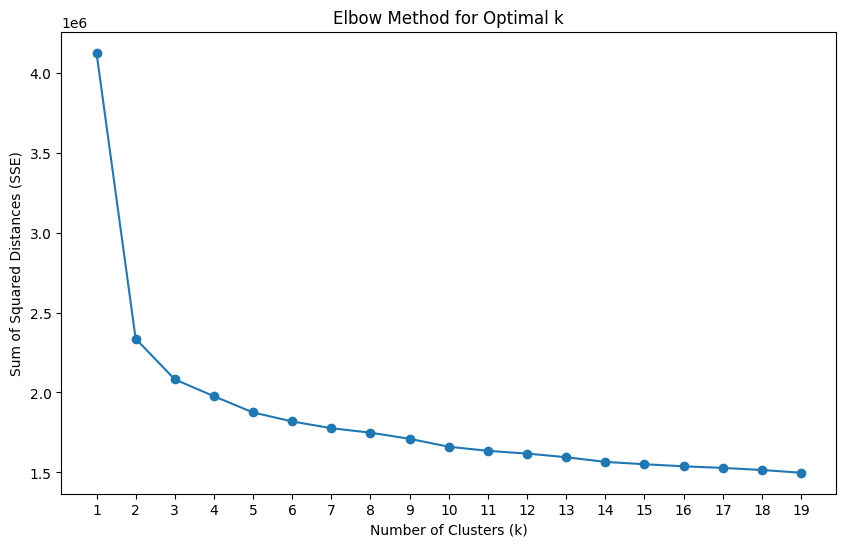

In [2]:
import os
from dotenv import load_dotenv
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

load_dotenv()
filepath = os.getenv('FILE_PATH')
data = pd.read_csv(filepath)

data = data.drop(columns=['subject', 'Activity'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

sse = []

k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.xticks(k_range)
plt.show()


In [7]:
import numpy as np

first_diff = np.diff(sse)
second_diff = np.diff(first_diff)

optimal_k_index = np.argmax(second_diff) + 2

optimal_k = k_range[optimal_k_index]

print("Optimal k value:", optimal_k)


Optimal k value: 3
